### NUWECASH DATA SCIENCE

In [13]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("./J2D_train.csv")
df.head()

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16105 non-null  int64  
 1   amount           16105 non-null  float64
 2   status           16105 non-null  object 
 3   created_at       16105 non-null  object 
 4   user_id          14218 non-null  float64
 5   money_back_date  9498 non-null   object 
 6   transfer_type    16105 non-null  object 
 7   send_at          8776 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1006.7+ KB


In [44]:
df.describe()

,id,amount,user_id
count,16105.000000,16105.000000,14218.000000
mean,9577.939770,87.722384,19328.963075
std,5495.677337,22.546287,13770.497673
min,3.000000,1.000000,34.000000
25%,4614.000000,80.000000,8074.000000
50%,9937.000000,100.000000,17029.500000
75%,14369.000000,100.000000,29726.500000
max,18614.000000,200.000000,57362.000000


In [45]:
# Parse Month ID for both created_at and send_at datetimes
df['created_at'] = pd.to_datetime(df['created_at'])
df['send_at'] = pd.to_datetime(df['send_at'])

minYear = int(min(df['created_at'].min().year, df['send_at'].min().year))

df.insert(4, column = 'created_at_month', value = df['created_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df.insert(9, column = 'send_at_month', value = df['send_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0
...,...,...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00:00,20,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00:00,20.0
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00:00,20,NaN,NaN,instant,2020-08-31 00:33:58.824223+00:00,20.0
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00:00,17,2562.0,2020-06-13 00:16:39.223405+00,regular,NaT,NaN
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00:00,19,NaN,NaN,regular,NaT,NaN


In [46]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


**Data Analysis**

The only matter is null users (no possible identification)

In [47]:
nullUsers = df.loc[df['user_id'].isnull()]
print(nullUsers.shape)
nullUsers

(1887, 10)


,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
5,8110,100.0,rejected,2020-07-15 09:13:26.477317+00:00,19,NaN,NaN,regular,NaT,NaN
31,18341,100.0,rejected,2020-09-29 08:25:51.172466+00:00,21,NaN,NaN,instant,2020-10-06 08:25:51.126003+00:00,22.0
37,14998,50.0,rejected,2020-09-07 17:39:59.551790+00:00,21,NaN,NaN,instant,2020-09-14 17:39:59.493759+00:00,21.0
41,5399,100.0,rejected,2020-06-25 20:50:26.169548+00:00,18,NaN,NaN,regular,NaT,NaN
45,5792,100.0,approved,2020-06-29 14:35:10.782864+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
16077,130,100.0,approved,2019-12-12 19:04:15.240544+00:00,12,NaN,NaN,regular,NaT,NaN
16079,12011,100.0,rejected,2020-08-11 14:55:07.406851+00:00,20,NaN,NaN,instant,2020-08-18 14:55:07.406299+00:00,20.0
16099,1399,100.0,approved,2020-04-27 16:47:02.126576+00:00,16,NaN,2020-05-19 20:06:01.595287+00,regular,NaT,NaN
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00:00,20,NaN,NaN,instant,2020-08-31 00:33:58.824223+00:00,20.0


In [48]:
# Which of them have accepted transferences?
nullUsersWithTransference = nullUsers.loc[nullUsers['status'] == 'approved']
print(nullUsersWithTransference.shape)
nullUsersWithTransference.head()

(592, 10)


,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
45,5792,100.0,approved,2020-06-29 14:35:10.782864+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
105,4923,100.0,approved,2020-06-24 07:49:18.790806+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
106,331,100.0,approved,2019-12-28 12:43:52.108300+00:00,12,NaN,2020-03-12 23:30:36.947077+00,regular,NaT,NaN
134,7926,100.0,approved,2020-07-14 08:17:56.674292+00:00,19,NaN,2020-09-06 19:48:58.558665+00,regular,NaT,NaN
144,6585,100.0,approved,2020-07-04 13:03:22.981679+00:00,19,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN


In [49]:
# Is user id unique?
df['user_id'].value_counts()

3377.0     18
2142.0     18
13851.0    17
1159.0     16
15219.0    16
           ..
28233.0     1
163.0       1
49612.0     1
40083.0     1
13483.0     1
Name: user_id, Length: 6029, dtype: int64

**1. Número de nuevos usarios por mes:**

In [51]:
unique_users_month = dict()     # {month_id : set(unique_users) }
created_users_month = dict()    # {month_id : number of created users}

uniqueMonths = sorted(df['created_at_month'].unique()) # Unique Months list

for i in range(len(uniqueMonths)):

    currentMonth = uniqueMonths[i]
    lastMonth = uniqueMonths[i - 1]
    
    # Unique users per Month 
    unique_users_month[currentMonth] = set(df.loc[df['created_at_month'] == currentMonth, 'user_id'].dropna())

    # Compute how much created users are per month
    if i == 0: created_users_month[currentMonth] = len(unique_users_month[currentMonth])
    else: created_users_month[currentMonth] = len(unique_users_month[currentMonth] - unique_users_month[lastMonth])

print(created_users_month)

{11: 1, 12: 204, 13: 90, 14: 112, 15: 111, 16: 271, 17: 415, 18: 1410, 19: 1397, 20: 991, 21: 2110}


Text(0.5, 0, 'Month ID')

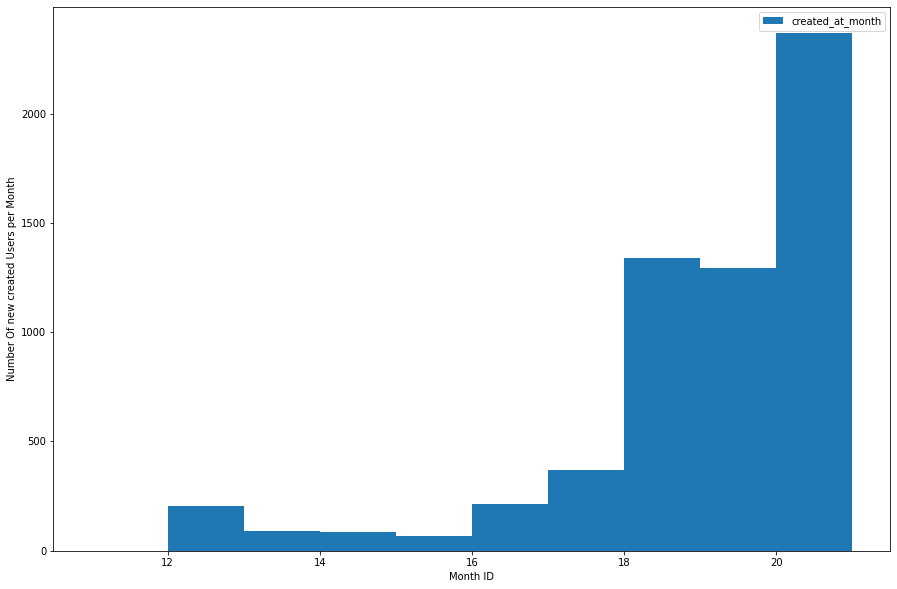

In [52]:
# 
minDatesPerUser = pd.DataFrame(df.groupby('user_id')['created_at_month'].min())
ax = minDatesPerUser.plot(kind = 'hist', figsize = (15, 10))
ax.set_ylabel("Number Of new created Users per Month")
ax.set_xlabel("Month ID")

In [77]:
pd.DataFrame(minDatesPerUser.reset_index().groupby('created_at_month')['user_id'].count())

,user_id
created_at_month,
11,1
12,204
13,90
14,84
15,69
16,212
17,369
18,1338
19,1294


**2. Dinero total solicitado cada mes.**

In [60]:
df_eu_mes=df.groupby(['created_at_month'])['amount'].sum()

In [61]:
df_eu_mes.to_frame().reset_index()
df_eu_mes

created_at_month
11         1.0
12     27297.0
13     21587.0
14     16653.0
15     23549.0
16     46093.0
17     79236.0
18    246026.0
19    328187.0
20    287633.0
21    336507.0
Name: amount, dtype: float64

**3. Dinero medio solicitado por cada usuario al mes.**

In [82]:
dfmean1=df.groupby(['created_at_month'])['id'].count()

In [83]:
dfmean1

created_at_month
11       1
12     289
13     223
14     184
15     244
16     473
17     837
18    2615
19    3601
20    3417
21    4221
Name: id, dtype: int64

In [84]:
df_tot=df.groupby(['created_at_month'])['amount'].sum()

In [85]:
result = pd.concat([dfmean1, df_tot], axis=1)
result

,id,amount
created_at_month,,
11,1,1.0
12,289,27297.0
13,223,21587.0
14,184,16653.0
15,244,23549.0
16,473,46093.0
17,837,79236.0
18,2615,246026.0
19,3601,328187.0


In [86]:
result

,id,amount
created_at_month,,
11,1,1.0
12,289,27297.0
13,223,21587.0
14,184,16653.0
15,244,23549.0
16,473,46093.0
17,837,79236.0
18,2615,246026.0
19,3601,328187.0


In [89]:
result['mean']=result['amount']/result['id']
result

,id,amount,mean
created_at_month,,,
11,1,1.0,1.000000
12,289,27297.0,94.453287
13,223,21587.0,96.802691
14,184,16653.0,90.505435
15,244,23549.0,96.512295
16,473,46093.0,97.448203
17,837,79236.0,94.666667
18,2615,246026.0,94.082600
19,3601,328187.0,91.137740


In [81]:
result.drop(['user_id','mean'], axis=1,inplace=True)
result

,amount
created_at_month,
11,1.0
12,27297.0
13,21587.0
14,16653.0
15,23549.0
16,46093.0
17,79236.0
18,246026.0
19,328187.0


**4. Porcentaje de las solicitudes Aceptadas por cada Mes**

In [58]:
approvedStatusPerMonth = df[df['status'] == 'approved'].groupby('created_at_month')['status'].count()
rejectedStatusPerMonth = df[df['status'] == 'rejected'].groupby('created_at_month')['status'].count()

approvedStatusPerMonth / (approvedStatusPerMonth + rejectedStatusPerMonth)

created_at_month
11         NaN
12    0.619377
13    0.497758
14    0.608696
15    0.692623
16    0.682875
17    0.728793
18    0.630593
19    0.559567
20    0.592918
21    0.656716
Name: status, dtype: float64

**5. Número de solicitudes al mes que son aceptadas pero NO son devueltas.**

In [68]:
dfacc=df[df['status']=='approved']
dfacc=dfacc.groupby(['created_at_month']).count()
dfacc

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,send_at_month
created_at_month,,,,,,,,,
12,179,179,179,179,151,37,179,0,0
13,111,111,111,111,93,75,111,0,0
14,112,112,112,112,106,73,112,0,0
15,169,169,169,169,152,168,169,0,0
16,323,323,323,323,298,322,323,0,0
17,610,610,610,610,560,610,610,0,0
18,1649,1649,1649,1649,1505,1639,1649,0,0
19,2015,2015,2015,2015,1885,1951,2015,560,560
20,2026,2026,2026,2026,1941,1959,2026,2026,2026


In [69]:
dfacc['nodevueltas']=dfacc['transfer_type']-dfacc['money_back_date']
df_nodevueltas=dfacc['nodevueltas']
df_nodevueltas.columns =['Month', 'NoDevueltas_total']

In [71]:
df_nodevueltas

created_at_month
12    142
13     36
14     39
15      1
16      1
17      0
18     10
19     64
20     67
21    109
Name: nodevueltas, dtype: int64

**6. Número de solicitudes al mes que son aceptadas y SÍ son devueltas.**

In [75]:
df_devueltas=dfacc.copy().reset_index()
df_devueltas=df_devueltas[['created_at_month','money_back_date']]
df_devueltas.columns =['Month', 'Devueltas_total']
df_devueltas

,Month,Devueltas_total
0,12,37
1,13,75
2,14,73
3,15,168
4,16,322
5,17,610
6,18,1639
7,19,1951
8,20,1959
9,21,2663


**7. Tiempo medio en devolver un préstamo (MM:DD:HH)**

In [59]:
(df['send_at'] - df['created_at']).mean()

Timedelta('7 days 07:58:08.014195150')

**8. Cantidad de dinero que se presta cada mes.**

In [36]:
df.groupby('created_at_month')['amount'].sum()

created_at_month
11         1.0
12     27297.0
13     21587.0
14     16653.0
15     23549.0
16     46093.0
17     79236.0
18    246026.0
19    328187.0
20    287633.0
21    336507.0
Name: amount, dtype: float64

**9 Modelo de regressión**

In [98]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


In [ ]:
# Generated data from the dataset



#transformer = ColumnTransformer(OneHotEncoder)
#transformer.fit_transform(X[['country_code']])
encoded_categories = ['country_code', 'payment_status']
X_encoded = pd.get_dummies(X, columns = encoded_categories)#.drop(columns = encoded_categories)
X_encoded


In [95]:
df['created_at_month'].apply(lambda time: time.date).unique()

array([datetime.date(2020, 6, 20), datetime.date(2020, 8, 19),
       datetime.date(2020, 8, 11), datetime.date(2020, 8, 7),
       datetime.date(2020, 9, 18), datetime.date(2020, 7, 15),
       datetime.date(2020, 8, 22), datetime.date(2020, 9, 16),
       datetime.date(2020, 8, 17), datetime.date(2020, 9, 14),
       datetime.date(2020, 8, 2), datetime.date(2020, 7, 27),
       datetime.date(2020, 6, 11), datetime.date(2020, 9, 15),
       datetime.date(2020, 8, 3), datetime.date(2020, 9, 22),
       datetime.date(2020, 7, 22), datetime.date(2020, 9, 4),
       datetime.date(2020, 9, 11), datetime.date(2020, 5, 31),
       datetime.date(2020, 6, 16), datetime.date(2020, 7, 30),
       datetime.date(2020, 7, 7), datetime.date(2020, 9, 5),
       datetime.date(2020, 7, 8), datetime.date(2020, 9, 6),
       datetime.date(2020, 9, 29), datetime.date(2020, 6, 30),
       datetime.date(2020, 8, 15), datetime.date(2020, 9, 7),
       datetime.date(2020, 9, 27), datetime.date(2020, 3, 4),
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# entrenem el bosc aleatori
forest = RandomForestClassifier(criterion='gini', n_estimators=10000, random_state=0, n_jobs = 2)
forest.fit(X_train, Y_train)